<h1 align ="center">Airbnb Hotel Booking Analysis </h1>

Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Access the Data

In [2]:
# Read the Airbnb dataset
df = pd.read_csv('Dataset/Airbnb_Open_Data.csv',low_memory=False)


In [3]:
#Display the top 5 records
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
#Check the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
#check the duplicate the value and count it.
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

Filter the Data


In [6]:
# Neighbourhood group was 'Brookln' insted of 'Brooklyn'
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


Problem Identified within the Dataset

1. 541 duplicated records where found in the data.
2. Insufficient info were recorded for the house_rules and Licence columns.
3. Dollar signs and commas recorded along with the values for price and service fee.
4. The Currency for price and service fee were not added to the columns titles.
5. Missing values in some records.
6. Columns like the price ,service fee,id,host id,last review,Construction year are assigned wrong datatypes.
7. In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.
8. Some Outliers were identified in the availability 365 column.

Clean the Data

Steps to be Taken for Data Cleaning

1. Drop duplicated records.
2. Drop house_rules and license columns with insufficient data.
3. Remove all dollar signs in the price and service fee columns.
4. Remove all commas from the price and service fee columns.
5. Rename the price and service fee columns to include a dollar signs.
6. Drop all records with missing values.
7. Change all mismatched data types to the appropriate once.
8. Correct the spelling of 'brookln' to 'Brooklyn'.
9. Get rid of outliers in the availabilty 365 column data.

In [7]:
#Drop duplicate records
df.drop_duplicates(inplace =True)


# drop house_rules and license columns with insufficient data
df.drop(['house_rules','license'], axis = 1 ,inplace=True,errors='ignore')

# Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].str.replace('$','',regex=False)
df['service fee'] = df['service fee'].str.replace('$','',regex=False)


#Remove all commas in the price and service fee columns
df['price'] = df['price'].str.replace(',','',regex=False)
df['service fee'] = df['service fee'].str.replace(',',' ',regex=False)


# Rename the price and service fee columns to include a dollar sign
df.rename(columns= {
    'price':'price_$',
    'service fee':'service_fee_$'
} ,inplace=True)

# drop all records with missing values
df.dropna(inplace=True)

#Change all mismatched data types to the appropriate once.
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

# Correct the spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln','neighbourhood group'] = 'Brooklyn'

#Get rid of outlier in the 'availability 365' column data
df = df.drop(df[df['availability 365'] > 500].index)



In [8]:
df.duplicated().value_counts()

False    83411
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null  object        
 11  instan

Exploratory Data Analysis (EDA)

Summary Statistics

In [10]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411,83411.000000,83411.000000,83411.000000,83411.000000
mean,40.727353,-73.948500,2012.488509,626.212730,125.243709,7.405366,32.276642,2019-06-08 22:01:01.027922176,1.377584,3.278776,7.032682,141.742612
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762595,-73.930815,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056324,0.050347,5.760870,331.787179,66.360979,28.102221,51.957777,NaN,1.751041,1.283599,29.551590,133.368399


What are the different property types in the Dataset?

In [11]:
#What are the different property types in the Dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


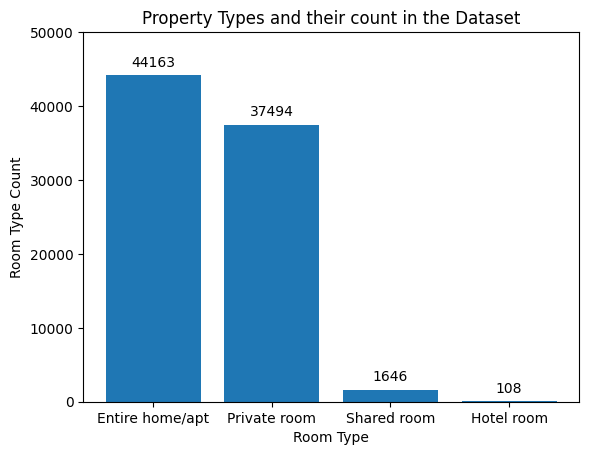

In [12]:
#Room type count plotted on a barchart
room_type_bar = plt.bar(property_types.index,property_types.loc[:,'count']);
plt.bar_label(room_type_bar,labels = property_types.loc[:,'count'],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset');

The Airbnb open dataset reveals 4 distinct property or room types. These categories comprise;
1. Entire home/apt - 44163
2. Private room - 37494
3. Shared room - 1646
4. Hotel room - 108

Which neighborhood group has the highest number of listings?

In [13]:
hood_groups = df['neighbourhood group'].value_counts().to_frame()
hood_groups 

,count
neighbourhood group,
Brooklyn,34636
Manhattan,34566
Queens,11126
Bronx,2267
Staten Island,816


Text(0.5, 1.0, 'Which Neighbourhood group has the highest no of listings')

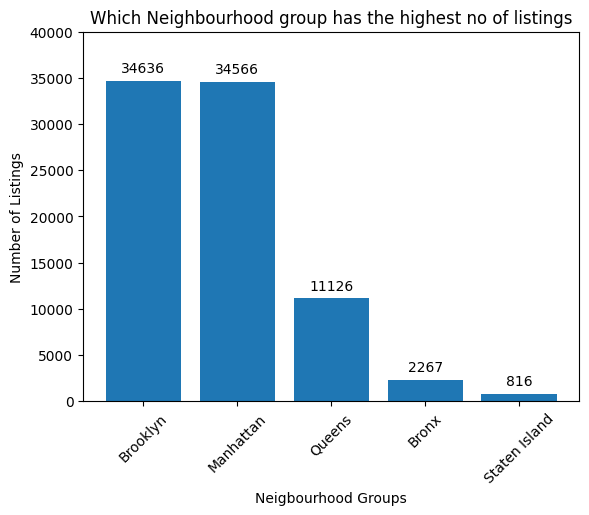

In [14]:
# which neighbourhood group has the highest no of  listing?
hood_groups_bar = plt.bar(hood_groups.index,hood_groups.loc[:,'count']);
plt.bar_label(hood_groups_bar,labels= hood_groups.loc[:,'count'],padding = 4)
plt.ylim([0,40000]);
plt.xlabel('Neigbourhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45)
plt.title('Which Neighbourhood group has the highest no of listings')

Dataset contain 5 different neighbourhood groups namely - 
1. Brooklyn
2. Manhattan
3. Queens
4. Bronx
5. Staten island

Which neighbourhood group have the highest average prices for Airbnb listings?

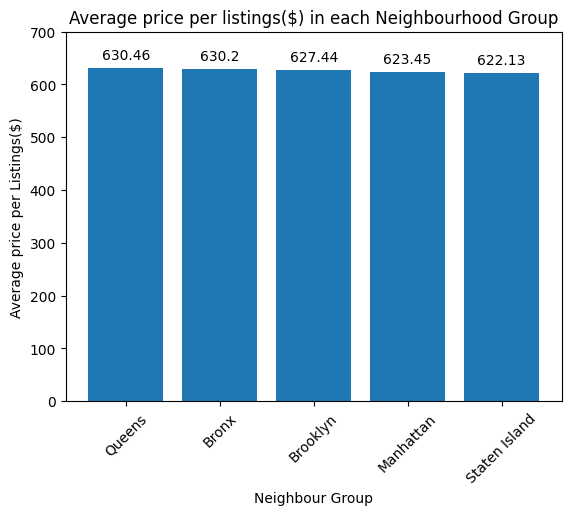

In [15]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index , avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar,labels= round(avg_price.loc[:,'price_$'],2),label_type = 'edge',padding=4)
plt.ylim([0,700]);
plt.xlabel('Neighbour Group');
plt.ylabel('Average price per Listings($)');
plt.xticks(rotation=45);
plt.title('Average price per listings($) in each Neighbourhood Group');


Is there a relationship between the construction year of property and price ?

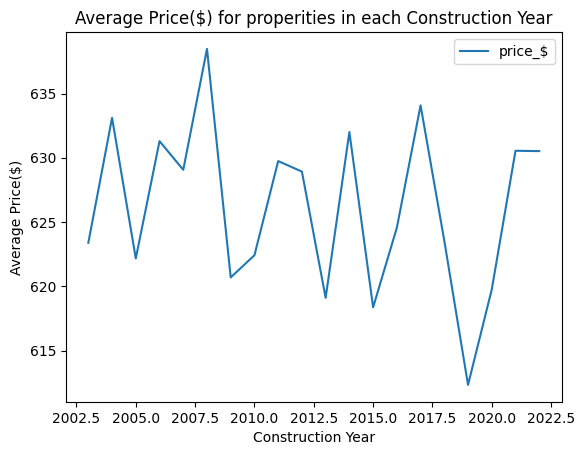

In [16]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price($)');
plt.title('Average Price($) for properities in each Construction Year');

Who are the Top 10 hosts by calculated host listing count?

10 hosts with the highest calculated host counts

AttributeError: Rectangle.set() got an unexpected keyword argument 'palette'

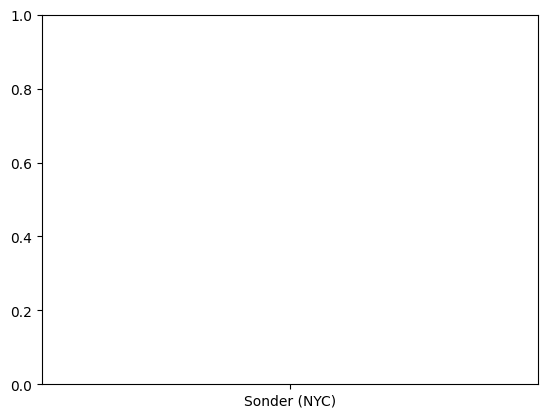

In [ ]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame();
hosts_bar = plt.bar(hosts.index,hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar,label =hosts.loc[:,'calculated host listings count'],label_type= 'edge',padding=3)
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Counts');
plt.xticks(rotation=80);
plt.ylim([0,120000]);
plt.title('Top 10 hosts by calculated host Listings Count')




Are hosts with verified identities more likely to receive positive reviews?

In [ ]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending= False).to_frame();
review

In [ ]:
review_bar = plt.bar(review.index,review.loc[:,'review rate number']);
plt.bar_label(review_bar,labels = round(review.loc[:,'review rate number'],2),padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel("Average Review Rate Number");
plt.title("Average Review Rate for each Verification Statistics.");

In [ ]:
base_color= sns.color_palette()[0]
sns.boxplot(data=df,x='host_identity_verified',y='review rate number',color=base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title("Average Review Rate for each Verification Status ");


Is there a correlation between the price of a listing and its service fee?

In [ ]:
df['price_$'].corr(df['service_fee_$'])

0.99 means the positive correlation between price and service fees

In [ ]:
sns.regplot(df,x='price_$',y ='service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee. ')

What is the average review rate number(eg., stars) for listings, and does it vary based on the neighbourhood group and room type ?

In [ ]:
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

In [ ]:
plt.figure(figsize=[12,10]);
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group. ');


Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

In [ ]:
sns.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel("Calculated Host Listings");
plt.ylabel("Availability 365");
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [ ]:
df['calculated host listings count'].corr(df['availability 365'])

Pearson correlation coefficient for the association between host listings and availability 365 is 0.136,indicating a weak positive correlation between the 2 variables.